In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-08-03 23:02:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   309MB/s    in 0.2s    

2022-08-03 23:02:56 (309 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [ ]:
import zipfile 

#unzip 
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os 
# joindir ==> path   ,,,, listdir ==> files
base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print ("\n content of train directory")
print(os.listdir(f'cats_and_dogs_filtered/train'))

print ("\n content of validation directory")
print(os.listdir(f'cats_and_dogs_filtered/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

 content of train directory
['cats', 'dogs']

 content of validation directory
['cats', 'dogs']


In [ ]:
train_dir = os.path.join('cats_and_dogs_filtered','train')
validation_dir = os.path.join('cats_and_dogs_filtered','validation')

dog_train_dir = os.path.join(train_dir,'dogs')
cat_train_dir = os.path.join(train_dir,'cats')

dog_val_dir = os.path.join(validation_dir,'dogs')
cat_val_dir = os.path.join(validation_dir,'cats')

In [ ]:
cat_fnames_dir = os.listdir(cat_train_dir)
dog_fnames_dir = os.listdir(dog_train_dir)

print(cat_fnames_dir[:7])
print(dog_fnames_dir[:7])

['cat.496.jpg', 'cat.281.jpg', 'cat.682.jpg', 'cat.979.jpg', 'cat.843.jpg', 'cat.441.jpg', 'cat.602.jpg']
['dog.767.jpg', 'dog.706.jpg', 'dog.423.jpg', 'dog.722.jpg', 'dog.864.jpg', 'dog.345.jpg', 'dog.42.jpg']


In [ ]:
#the total number of data

print('the total number of dogs training data is: ',len(os.listdir(dog_train_dir)))
print('the total number of cats training data is: ',len(os.listdir(cat_train_dir)))
print('\n')
print('the total number of dogs validating data is: ',len(os.listdir(dog_val_dir)))
print('the total number of cats validating data is: ',len(os.listdir(cat_val_dir)))

the total number of dogs training data is:  1000
the total number of cats training data is:  1000


the total number of dogs validating data is:  500
the total number of cats validating data is:  500


In [ ]:
%matplotlib inline 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#4x4 plot configuration 
nrows = 4 
ncols = 4    

pic_index = 0 #Index for iterating under images  

#testing
cat_fnames_dir[0:8]


['cat.496.jpg',
 'cat.281.jpg',
 'cat.682.jpg',
 'cat.979.jpg',
 'cat.843.jpg',
 'cat.441.jpg',
 'cat.602.jpg',
 'cat.158.jpg']

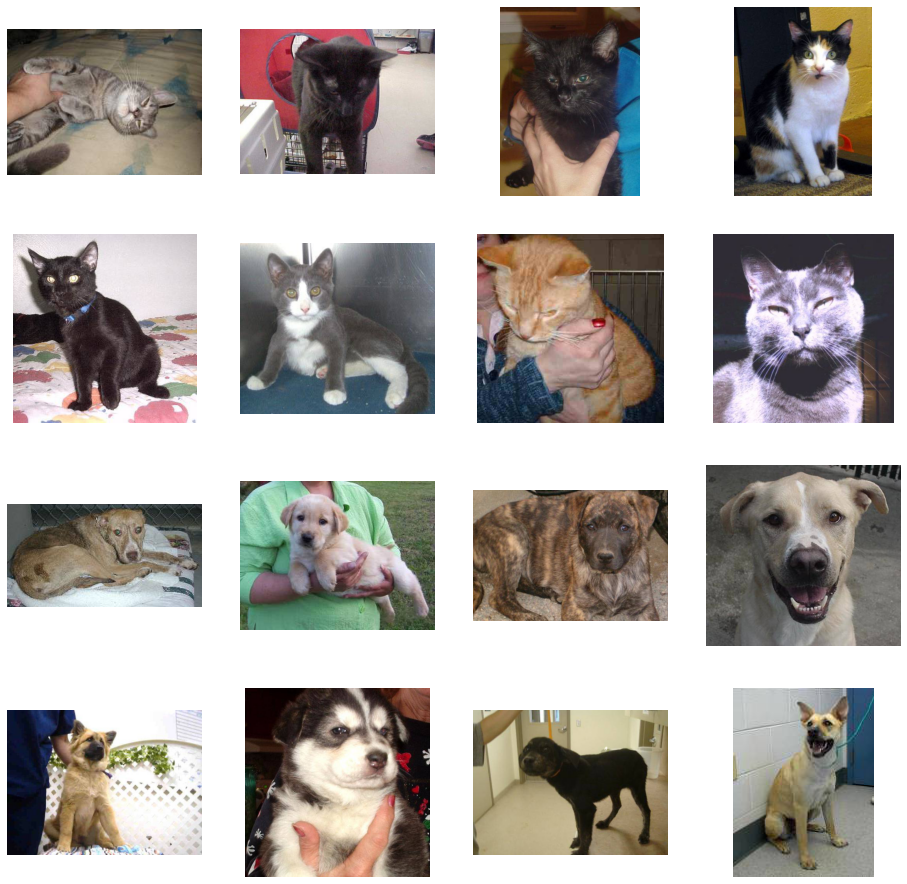

In [ ]:
#plot config 
figure = plt.gcf()                        #create a matrix for images 
figure.set_size_inches(ncols*4,nrows*4)    #size of the matrix 


pic_index+=8 

next_cat_pix = [os.path.join(cat_train_dir , fname)
                for fname in cat_fnames_dir[ pic_index-8:pic_index]    #Selection of image paths by names of images in cat_train_dir path [0:8]
                ]
next_dog_pix = [os.path.join(dog_train_dir, fname) 
                for fname in dog_fnames_dir[ pic_index-8:pic_index]    
               ]            


for i, img_path in enumerate(next_cat_pix+next_dog_pix):              #enumerate ==>   (1,image1's path),(2,image2's path).... 
  sp=plt.subplot(nrows , ncols , i+1)    # image matrix 4x4    
  sp.axis(False)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neurons hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Data Training preprocessing
train_datagen = ImageDataGenerator (rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20 , class_mode = 'binary' , target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [ ]:
#Data Evaluation preprocessing 
test_datagen= ImageDataGenerator (rescale = 1.0/255)

validation_generator = test_datagen.flow_from_directory(validation_dir , batch_size=20 ,class_mode = 'binary',target_size = (150,150))

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            )

Epoch 1/15
100/100 [==============================] - 11s 85ms/step - loss: 0.7145 - accuracy: 0.5280 - val_loss: 0.6765 - val_accuracy: 0.5700
Epoch 2/15
100/100 [==============================] - 9s 86ms/step - loss: 0.6535 - accuracy: 0.6280 - val_loss: 0.6567 - val_accuracy: 0.6270
Epoch 3/15
100/100 [==============================] - 9s 86ms/step - loss: 0.6001 - accuracy: 0.6900 - val_loss: 0.6145 - val_accuracy: 0.6810
Epoch 4/15
100/100 [==============================] - 8s 82ms/step - loss: 0.5135 - accuracy: 0.7420 - val_loss: 0.6109 - val_accuracy: 0.6950
Epoch 5/15
100/100 [==============================] - 8s 83ms/step - loss: 0.4250 - accuracy: 0.7990 - val_loss: 0.6633 - val_accuracy: 0.6800
Epoch 6/15
100/100 [==============================] - 8s 84ms/step - loss: 0.3111 - accuracy: 0.8675 - val_loss: 0.7005 - val_accuracy: 0.6940
Epoch 7/15
100/100 [==============================] - 8s 83ms/step - loss: 0.2119 - accuracy: 0.9115 - val_loss: 0.9030 - val_accuracy: 0.681

In [ ]:
#predicting from another source to evaluate 
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():             #uploaded.keys(is the path of a file)
 
  # predicting images
  path='/content/' + fn                #path of each image 
  img=image.load_img(path, target_size=(150, 150)) 
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")
 

In [ ]:
#show outputs of Conv layers 
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

NameError: ignored

In [ ]:
#we have always the overfiting problem so we can maybe fix it by stopping the training when the train loss decrease and the evaluate loss increase (stopping the overfitting)